In [104]:
from src.board import Board

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
class Entity:
    def integration():
        pass
    def aleatoire():
        pass
    def glisseur1():
        pass
    def glisseur2():
        pass
    def moulin():
        pass
    def canon():
        pass

In [ ]:
def glider(sens=True, direction=True, transpose=True):
    glider = np.zeros((3, 3))
    dir = 1 if direction else -1
    glider[-1, :] = 1
    glider[1 , 0] = 1
    glider[0 , 1] = 1
    return glider if sens else glider[::-1]

glider(True, False)
    

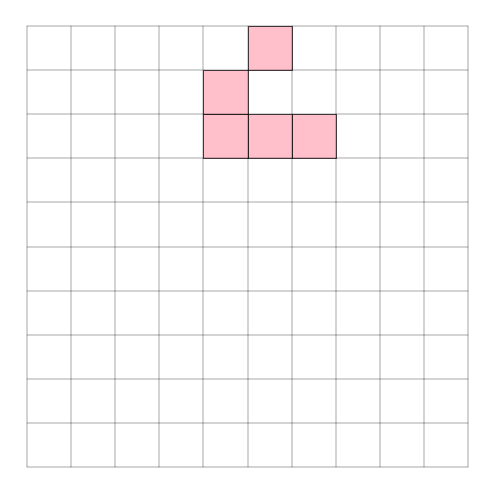

In [2]:
t0 = Board(10, [[2, 6], [2, 5], [2, 4], [1, 4], [0, 5]])
t0.plot()

In [3]:
t0.animate()

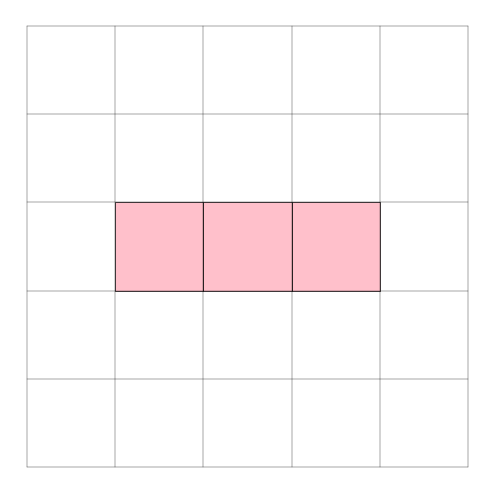

In [231]:
t0_clignotant = Board(5, [[2, 1], [2, 2], [2, 3]])
t0_clignotant.plot()

In [230]:
t0_clignotant.animate()